In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [3]:
# Load clean data
root = Path().resolve().parent 
data_path = root / "data" / "Process" / "cleaned_gold_price_data.csv" 
df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])

# describe data
print (df['close'].describe())


count    2795.000000
mean     1803.979211
std       732.584908
min      1050.800049
25%      1273.350037
50%      1712.699951
75%      1944.699951
max      5318.399902
Name: close, dtype: float64


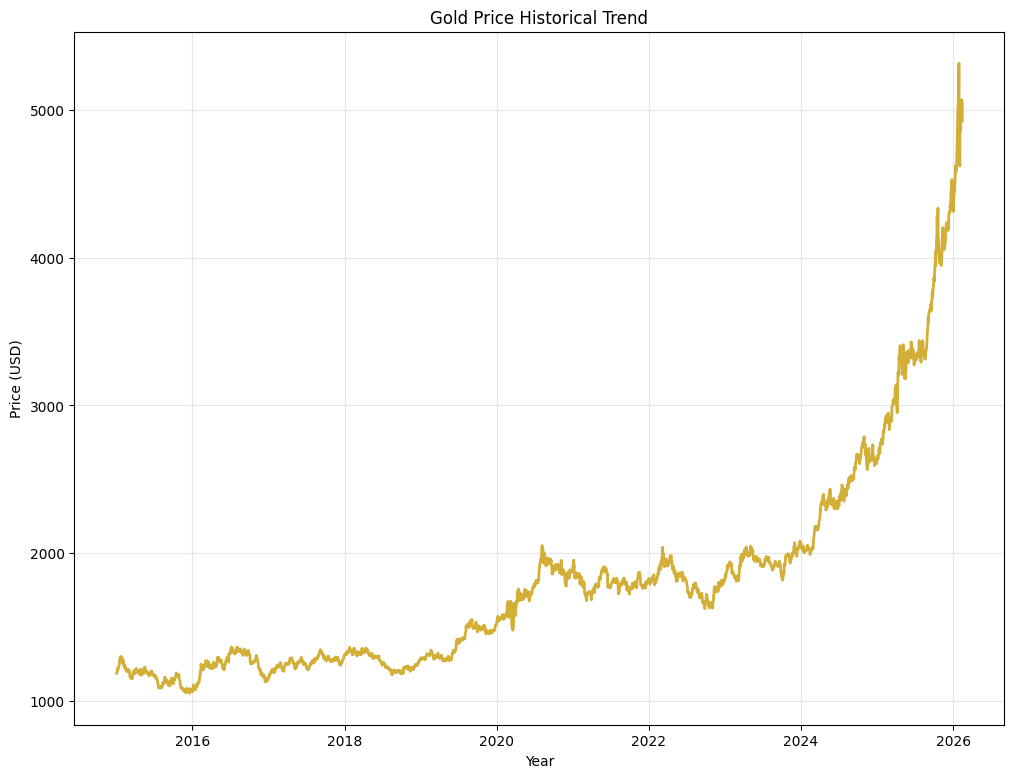

In [6]:
# Graph 1: Historical Price Trend (Line Chart)
plt.figure(figsize=(12,9))
plt.plot(
    df['date'], 
    df['close'], 
    color = '#D4AF37',  
    linewidth = 2
)
plt.title('Gold Price Historical Trend')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.savefig('../images/graph1_trend.png', dpi=300, bbox_inches='tight')
plt.show()

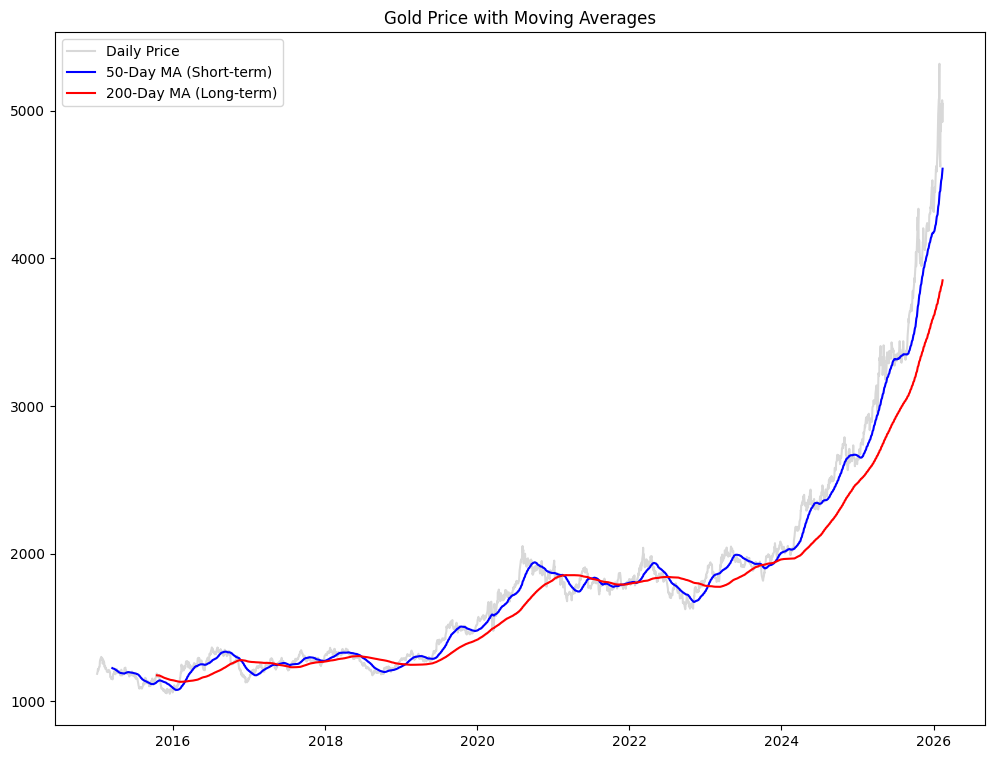

In [12]:
# Graph 2: Moving Average Analysis (MA50 & MA200)
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

plt.figure(figsize=(12,9))
plt.plot(
    df['date'],
    df['close'],
    label='Daily Price',
    alpha=0.3,
    color = 'gray'
)
plt.plot(
    df['date'],
    df['MA50'],
    label='50-Day MA (Short-term)',
    color='blue'
)
plt.plot(
    df['date'],
    df['MA200'],
    label='200-Day MA (Long-term)',
    color='red'
)
plt.title('Gold Price with Moving Averages')
plt.legend()
plt.savefig('../images/graph2_customer_spending.png')
plt.show()

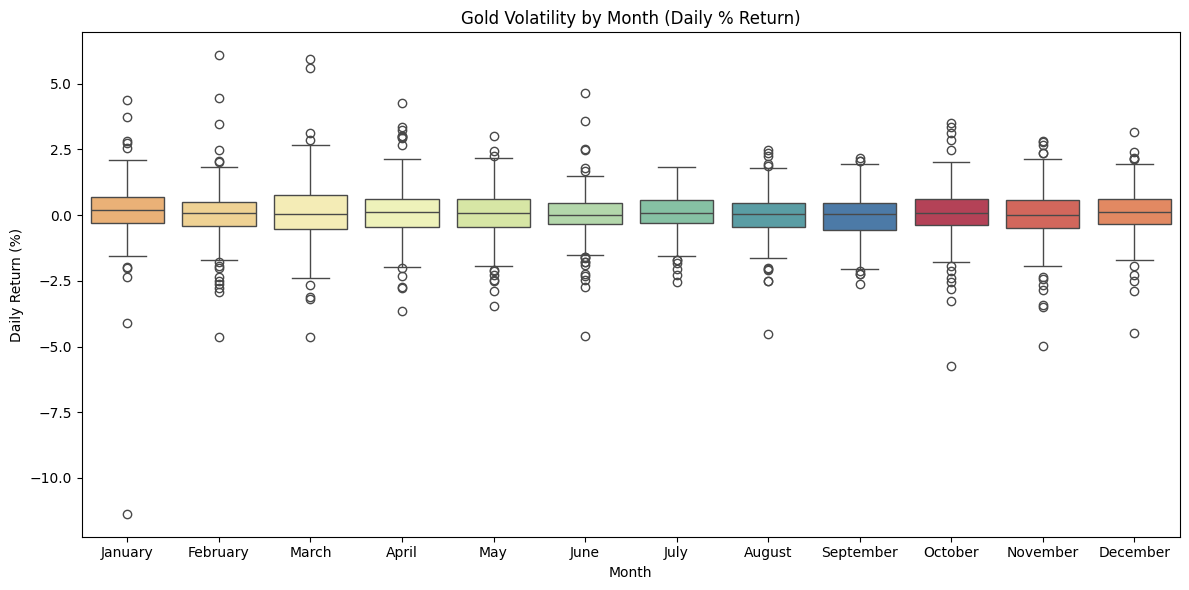

In [20]:
df = df.sort_values('date')
df['return_pct'] = df['close'].pct_change() * 100
df = df.dropna()
df['month'] = df['date'].dt.month_name()

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='month',
    y='return_pct',
    order=month_order,
    hue='month',          
    palette='Spectral',
    dodge=False,          
    legend=False          
)

plt.title('Gold Volatility by Month (Daily % Return)')
plt.xlabel('Month')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../images/graph3_monthly_volatility_box.png', dpi=300)
plt.show()

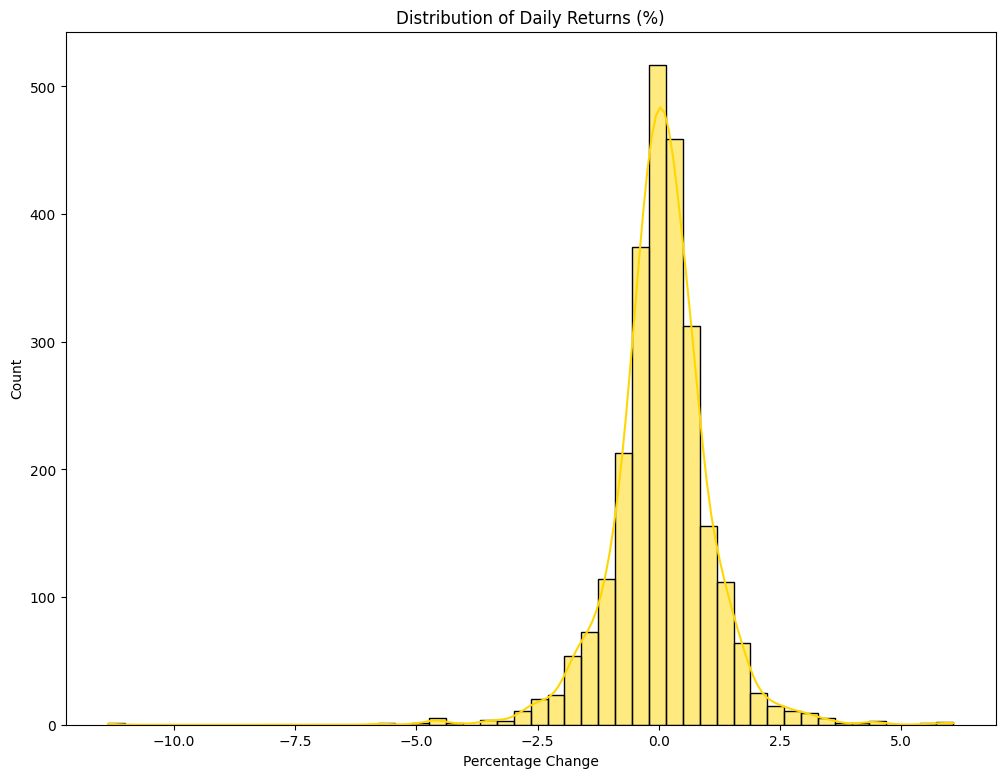

In [22]:
# Graph 4: Daily Returns Distribution (Histogram + KDE)
df['daily_return'] = df['close'].pct_change() * 100

plt.figure(figsize=(12, 9))
sns.histplot(
    df['daily_return'].dropna(), 
    bins=50, 
    kde=True, 
    color='gold'
)
plt.title('Distribution of Daily Returns (%)')
plt.xlabel('Percentage Change')
plt.savefig(root / 'images' / 'graph4_returns_dist.png')
plt.show()

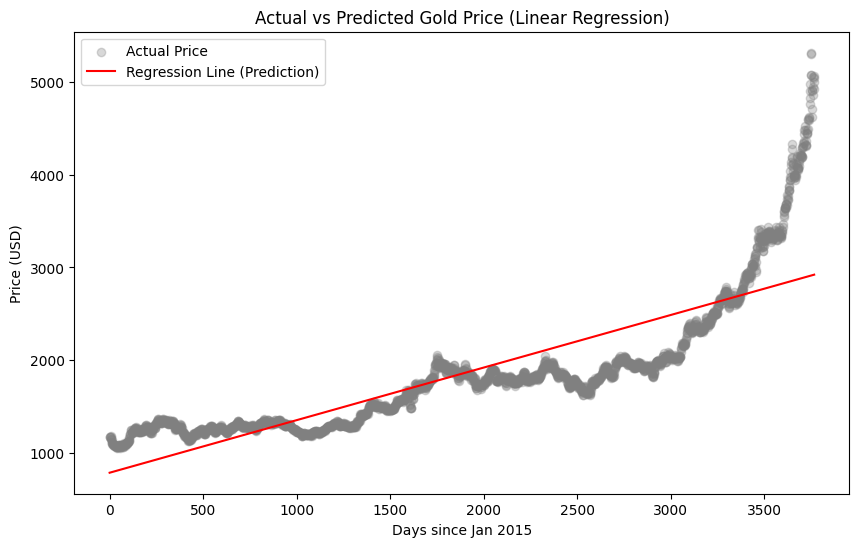

In [24]:
#Graph5: Actual vs. Predicted Price (Regression Line)
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
X = df[['days_since_start']].values
y = df['close'].values

model = LinearRegression().fit(X, y)
df['prediction'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['days_since_start'], df['close'], alpha=0.3, label='Actual Price', color='gray')
plt.plot(df['days_since_start'], df['prediction'], color='red', label='Regression Line (Prediction)')
plt.title('Actual vs Predicted Gold Price (Linear Regression)')
plt.xlabel('Days since Jan 2015')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig(root / 'images' / 'graph5_regression.png')
plt.show()